### Данные представляют собой следующий набор:
 
    crim	 per capita crime rate by town
    zn	     proportion of residential land zoned for lots over 25,000 sq.ft
    indus	 proportion of non-retail business acres per town
    chas	 Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    nox	     nitric oxides concentration (parts per 10 million)
    rm	     average number of rooms per dwelling
    age	     proportion of owner-occupied units built prior to 1940
    dis	     weighted distances to five Boston employment centres
    rad	     index of accessibility to radial highways
    tax	     full-value property-tax rate per USD 10,000
    ptratio	 pupil-teacher ratio by town
    b	     1000(B - 0.63)^2 where B is the proportion of blacks by town
    lstat	 percentage of lower status of the population
    medv	 median value of owner-occupied homes in USD 1000's
	
    cmedv	 corrected median value of owner-occupied homes in USD 1000's
    town	 name of town
    tract	 census tract
    lon	     longitude of census tract
    lat	     latitude of census tract

   cmedv – значения, которые надо спрогнозировать (medv не будет использоваться, так как имеются скорректированные значения этого же признака)



In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics.regression import mean_squared_error
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet, ARDRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.grid_search import GridSearchCV

%matplotlib inline

In [2]:
boston = pd.read_csv('Housing.csv', delimiter=",")
boston.drop('Unnamed: 0', axis=1, inplace=True)
boston.drop(['medv'], axis=1, inplace=True)

X, y = boston.drop(['cmedv'], axis=1), boston.cmedv

Проверка на связность признаков:

In [3]:
boston.corr()

,tract,lon,lat,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
tract,1.000000,-0.220890,-0.225543,0.428252,-0.547165,0.367292,-0.575705,0.041356,-0.561862,0.305207,-0.487465,0.496841,-0.828829,-0.793811,-0.532678,0.365047,-0.522485
lon,-0.220890,1.000000,0.143054,-0.322947,0.065101,-0.218081,0.062702,-0.175619,0.167367,-0.257110,0.204739,-0.011243,0.034067,0.058812,0.312602,-0.018300,0.195630
lat,-0.225543,0.143054,1.000000,0.006826,-0.084293,-0.129667,-0.041093,-0.044726,-0.071789,-0.069317,0.079035,-0.082981,-0.207013,-0.169747,-0.004527,0.105254,0.045660
cmedv,0.428252,-0.322947,0.006826,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.418859,0.696304,-0.377999,0.249315,-0.384766,-0.464835,-0.505655,0.334861,-0.740836
crim,-0.547165,0.065101,-0.084293,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.411846,-0.219247,0.352734,-0.379670,0.625505,0.584894,0.289946,-0.385064,0.455621
zn,0.367292,-0.218081,-0.129667,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.513355,0.311991,-0.569537,0.664408,-0.311948,-0.306210,-0.391679,0.175520,-0.412995
indus,-0.575705,0.062702,-0.041093,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.759143,-0.391676,0.644779,-0.708027,0.595129,0.711655,0.383248,-0.356977,0.603800
chas,0.041356,-0.175619,-0.044726,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.096058,0.091251,0.086518,-0.099176,-0.007368,-0.024852,-0.121515,0.048788,-0.053929
nox,-0.561862,0.167367,-0.071789,-0.418859,0.411846,-0.513355,0.759143,0.096058,1.000000,-0.310112,0.729822,-0.770324,0.603532,0.649740,0.183588,-0.390833,0.589601
rm,0.305207,-0.257110,-0.069317,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.310112,1.000000,-0.240265,0.205246,-0.209847,-0.295443,-0.355501,0.128069,-0.613808


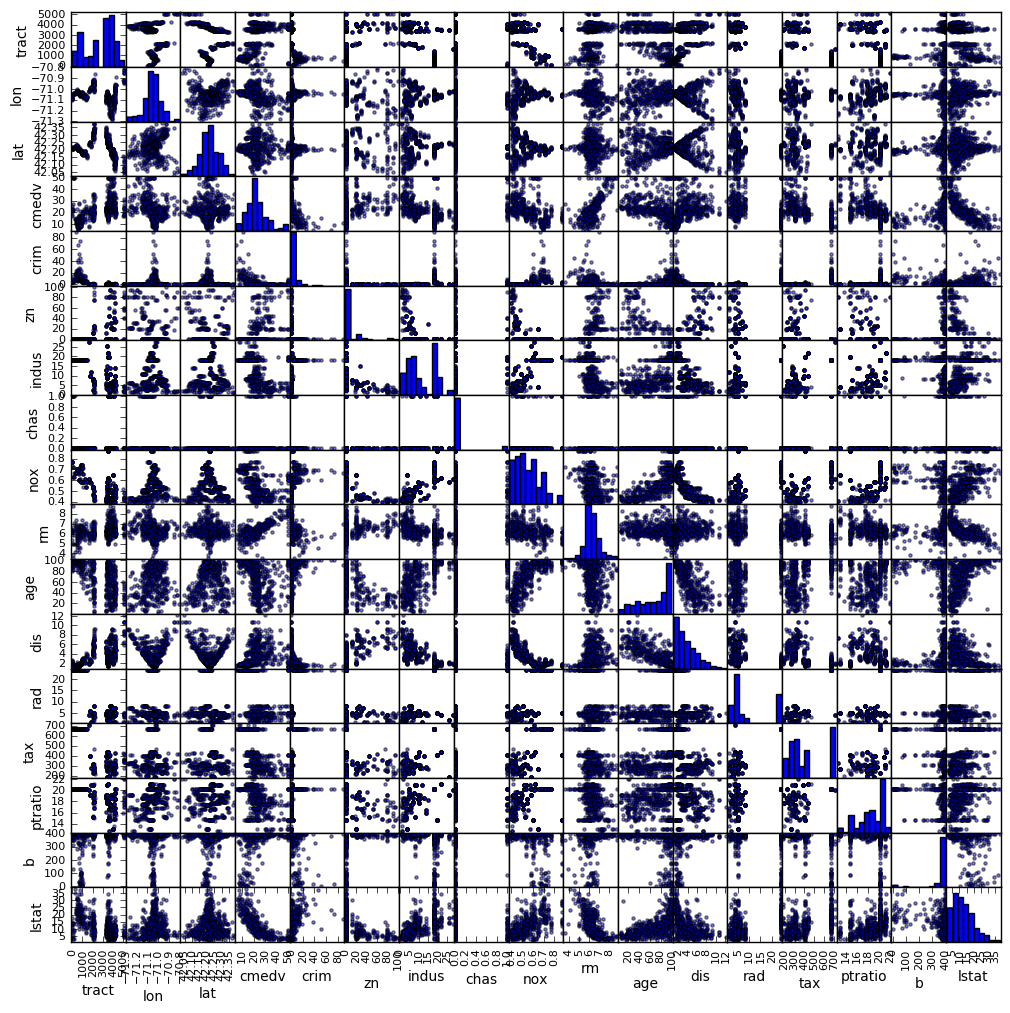

In [4]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(boston, figsize=(12, 12));

Больше всего прогнозное значение коррелирует с lstat (доля малоимущего населения), процент корреляци составляет 74%.

Отделим от выборки прогнозные значения, для предания случайности первоначально перемешаем строки

In [6]:
def train_test_split(X, y, train_size=0.7):
    train_len = int(len(X)*train_size)
    permuted = np.random.permutation(list(range(len(X))))
    X_train, y_train = X.ix[permuted[:train_len], :], y[permuted[:train_len]]
    X_test, y_test = X.ix[permuted[train_len:], :], y[permuted[train_len:]]
    return X_train, X_test, y_train, y_test

Проверка на наличие NaN значений

In [7]:
np.sum(X.isnull())

town        0
tract       0
lon         0
lat         0
crim        0
zn          0
indus       0
chas        0
nox        21
rm          0
age         0
dis         0
rad         0
tax        26
ptratio     0
b           0
lstat       0
dtype: int64

Чтобы избавиться от NaN значений в nox и tax, будем заполнять их средними значениями

In [8]:
def fill_na_my(X_in):
    X = X_in.copy()
    X.nox.fillna(X.nox.mean(), inplace=True)
    X.tax.fillna(X.tax.mean(), inplace=True)
    return X

Трансформируем категориальные переменные в индикаторные(dummy) переменные

In [9]:
def transform_data_simple(X_in):
    X = X_in.copy()
    X.drop(['tract'],axis=1)
    dum1 = pd.get_dummies(X['town'], prefix=['town'])
    dum2 = pd.get_dummies(X['rad'], prefix=['rad'])
    X.drop(['town', 'rad'], axis=1, inplace=True)
    cols = list(X.columns) + list(dum1.columns) + list(dum2.columns)
    return pd.DataFrame(np.hstack((X, dum1, dum2)), columns=cols)

In [10]:
X_t = transform_data_simple(X)
X_train, X_test, y_train, y_test = train_test_split(X_t, y)

In [11]:
X_train_trans = fill_na_my(X_train)
X_test_trans = fill_na_my(X_test)

После обработки данных переходим к построению моделей 

In [12]:
def test_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    print("mean: ", y_test.mean())
    print("result: ", mean_squared_error(y_test, out))

Будут использованы следующие модели:
 * Ridge - линейный метод наименьших квадратов с регуляризацией l2
 * Lasso - -||- с регуляризацией l1
 * RandomForestRegressor - cлучайный лес
 * AdaBoostRegressor - алгоритм усиления классификаторов
 * BaggingRegressor
 * ExtraTreesRegressor
 * GradientBoostingRegressor - градиентный бустинг
 * LinearRegression - линейная регрессия
 * ElasticNet
 * ARDRegression - метод релевантных векторов

Предварительно проведено скалирование

In [13]:
X_train_trans_scale = MinMaxScaler().fit_transform(X_train_trans)
X_test_trans_scale = MinMaxScaler().fit_transform(X_test_trans)
for model in [Ridge(alpha=0.3), 
              Lasso(), 
              Lasso(alpha=0.5), 
              RandomForestRegressor(n_estimators=100), 
              AdaBoostRegressor(), 
              BaggingRegressor(n_estimators=100), 
              ExtraTreesRegressor(n_estimators=100), 
              GradientBoostingRegressor(),
              LinearRegression(), 
              ElasticNet(),
              ARDRegression()]:
    print()
    print()
    print(model)
    print()
    
    test_model(model, X_train_trans_scale, y_train, X_test_trans_scale, y_test)



Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

mean:  21.95328947368421
result:  24.8134853979


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

mean:  21.95328947368421
result:  52.7245987713


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

mean:  21.95328947368421
result:  32.3182641859


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

mean:  21.9

Как видно из результатов, наименьшая среднеквадратичная ошибка регрессии (result) получена с помощью модели ExtraTreesRegressor

In [28]:
clf = ExtraTreesRegressor(n_estimators=100)

In [29]:
clf.fit(X_train_trans_scale, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [18]:
np.argsort(clf.feature_importances_)[:10]

array([16, 66, 72, 59, 97, 49, 79, 45, 50, 65], dtype=int64)

In [32]:
out = clf.predict(X_test_trans_scale)

In [36]:
out #предсказанные значение

array([ 15.795,   8.036,  11.923,  20.18 ,  20.474,  43.285,  17.394,
        21.73 ,  18.258,  22.255,  14.237,  18.187,   8.836,  20.799,
        20.914,  14.97 ,  27.304,  17.535,  18.452,  19.812,  12.731,
        20.909,  20.844,  23.431,  19.561,  15.339,  12.392,  32.942,
        36.967,  15.711,  33.449,  22.463,  19.691,  19.239,  45.545,
        30.102,   9.071,  21.832,  22.994,  14.538,  18.232,  17.365,
        15.822,  19.55 ,  20.796,  21.201,  25.659,  19.154,  17.368,
        23.132,  21.431,  18.298,  20.307,  25.016,  19.295,  22.7  ,
        26.206,  19.376,  23.162,  19.958,  29.323,  12.899,  19.413,
        19.056,  16.535,  40.874,  14.75 ,  19.537,  23.756,  16.058,
        15.874,  18.693,  18.477,  12.535,  16.683,  22.469,   7.892,
        13.172,  20.903,  15.   ,  26.097,  24.708,  20.694,   6.29 ,
        15.694,  12.187,  21.721,  25.936,  19.7  ,  32.442,  18.18 ,
        44.039,  10.322,  12.219,  22.025,  11.296,  20.173,  13.285,
        21.728,  19.

In [35]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, out))

9.27817686184


In [57]:
params = {'n_estimators' : [500,1000,1100], 'max_depth': [2,5,10]}
clf = ExtraTreesRegressor()
grid = GridSearchCV(clf, param_grid=params)

In [58]:
grid.fit(X_train_trans_scale, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500, 1000, 1100], 'max_depth': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [59]:
grid.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=1100, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [60]:
gridout = grid.predict(X_test_trans_scale)

In [61]:
print(metrics.mean_squared_error(y_test, gridout))

9.19817108945


# Вывод

Была задача предсказать стоимость домов в районах Бостона. Для этого был проведен анализ предоставленных данных. Из которых первым делом были убраны столбцы с нумерацией районов, из двух похожих признаков "средняя стоимость дома" и "скоректированная средняя стоимость дома" оставлен второй признак. Также в признаках, где имелись NaN значения, пропуски были заменены средним значением по столбцу, категориальные признаки 'town' и 'rad' трансформированы в индикоторные.

Для дальнейшего построения моделей данные были разделены на истинные и прогнозные значения.
Наилучшей моделью оказалась модель ExtraTreeRegression().
Для нахождения у этой модели лучших параметров был проведен GridSearchCV.